In [1]:
#Importing the Base required Libraries
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

 **Step 2: Data Exploration and Preprocessing**

2.1) ***Data Loading and Understanding***

In [14]:
#Loading the Dataset
df = pd.read_csv("D:/Analytics/Projects/Financial Fraud Project/Fraud.csv")

In [15]:
#Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
#Display the first few rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
#Calculate summary statistics for numerical columns
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


2.2) ***Handling Missing Values***

In [18]:
#Check for missing values in the dataset
missing_values =df.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


2.3) ***Correlation Analysis***

In [19]:
#checking for collinearity (newbalanceDest) > +- 0.8 is Strongly Correlated
X = df[['newbalanceDest', 'oldbalanceDest']]
corr_matrix = X.corr()
print(corr_matrix)

                newbalanceDest  oldbalanceDest
newbalanceDest        1.000000        0.976569
oldbalanceDest        0.976569        1.000000


In [20]:
#checking for collinearity (oldbalanceOrg) > +- 0.8 is Strongly Correlated
X = df[['oldbalanceOrg', 'newbalanceOrig']]
corr_matrix = X.corr()
print(corr_matrix)

                oldbalanceOrg  newbalanceOrig
oldbalanceOrg        1.000000        0.998803
newbalanceOrig       0.998803        1.000000


2.4) ***Feature Engineering***

In [21]:
#One-Hot encoding the type column for machine learning model 
df = pd.get_dummies(df, columns = ['type'], drop_first= True )
#Dropping irrelavant columns
df = df.drop(['nameOrig','nameDest'], axis =1)
#Feature Removed
df = df.drop(['type_DEBIT', 'type_PAYMENT'], axis=1)

**Step 3: Model Selection & Training**

In [22]:
#Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

3.1) ***Baseline Model***

In [23]:
# [24] Model
X = df.drop(['isFraud', 'oldbalanceDest','newbalanceOrig'], axis=1)
y = df['isFraud']

3.2) ***Model Training***

In [24]:
# Split the dataset into training and testing sets (no sampling, use the full dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

3.3) ***Hyperparameters Tuning***

In [25]:
#Intializing Random Forest
rf_classifier = RandomForestClassifier(n_estimators=25,max_depth=5, random_state=42)

In [26]:
#Fit the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=25, random_state=42)

In [27]:
#Predictions
y_pred = rf_classifier.predict(X_test)

**Step 4: Model Evaluation & Interpretation**

4.1) ***Performance Metrics***

Accuracy:  0.9989823374647551
Confusion Matrix:
 [[1270881       0]
 [   1295     348]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      0.21      0.35      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.61      0.67   1272524
weighted avg       1.00      1.00      1.00   1272524



<Axes: >

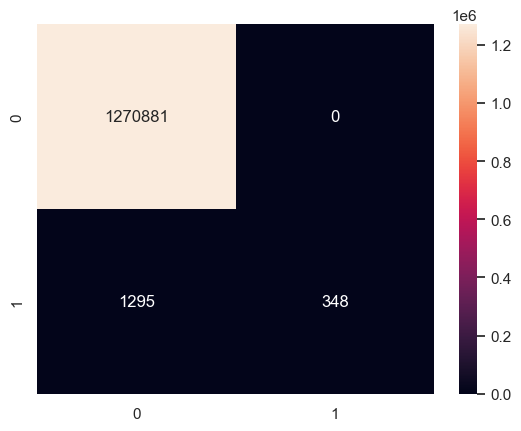

In [28]:
#Evaluating the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#Plotting Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='d')

ROC-AUC Score: 0.9728964911355364


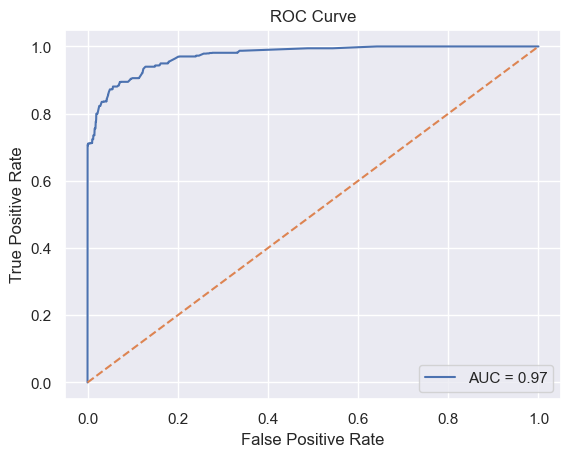

In [29]:
# ROC-AUC can be done for a more balanced evaluation metric
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf_classifier.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

4.2) ***Feature Importance***

In [30]:
#Get feature importances
feature_importances = rf_classifier.feature_importances_
#Create a DataFrame to store feature names and their importances
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
#Sort the DataFrame by importance in descending order
feature_df =feature_df.sort_values(by='Importance', ascending=False)

Text(0.5, 1.0, 'Feature Importance')

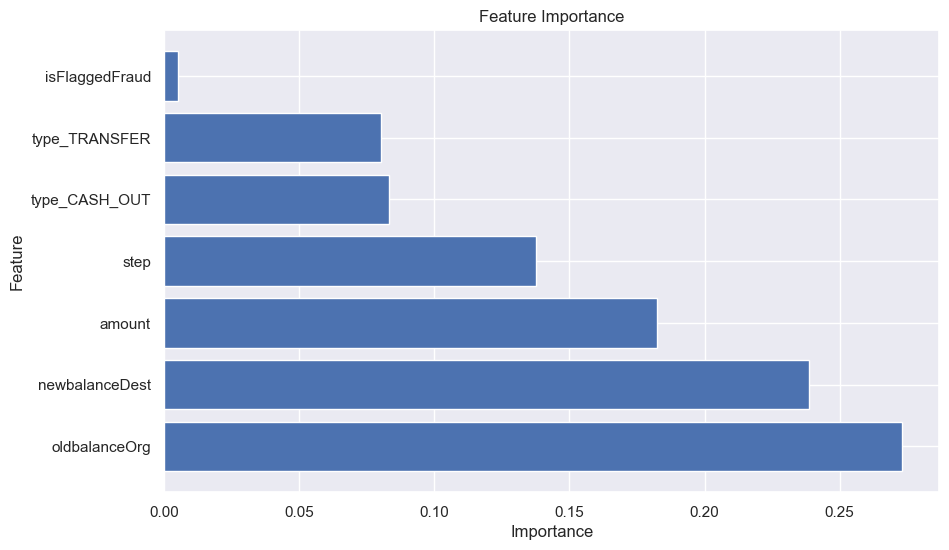

In [31]:
#Create horizontal bar graph
plt.figure(figsize=(10,6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')